### Exam 1
#### Madison Ward

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
url = "https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/refs/heads/master/CuratedDataSets/2022WorldCupPlayers.csv"

df = pd.read_csv(url)

df.head()

,player,position,nationality,age,club,birth_year,games,games_starts,minutes,minutes_90s,...,goals_assists_pens_per90,xg,npxg,xg_assist,npxg_xg_assist,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90
0,Aaron Mooy,MF,Australia,32-094,Celtic,1990,4,4,360,4.0,...,0.0,0.0,0.0,0.1,0.1,0.01,0.02,0.03,0.01,0.03
1,Aaron Ramsey,MF,Wales,31-357,Nice,1990,3,3,266,3.0,...,0.0,0.0,0.0,0.0,0.1,0.01,0.01,0.02,0.01,0.02
2,Abdelhamid Sabiri,MF,Morocco,26-020,Sampdoria,1996,5,2,181,2.0,...,0.5,0.1,0.1,0.9,1.0,0.08,0.53,0.60,0.08,0.60
3,Abdelkarim Hassan,DF,Qatar,29-112,Al Sadd SC,1993,3,3,270,3.0,...,0.0,0.3,0.3,0.0,0.3,0.10,0.01,0.11,0.10,0.11
4,Abderrazak Hamdallah,FW,Morocco,32-001,Al-Ittihad,1990,4,0,68,0.8,...,0.0,0.4,0.4,0.0,0.4,0.52,0.00,0.52,0.52,0.52


(a) The club I chose is FC Barcelona because it's a team I have heard of before. The popular player Lionel Messi used to play for them.

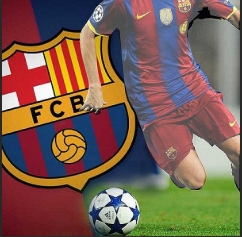

(b) Histogram of "Goals".

This histogram shows the difference in the numbers of goals among all the players. It appears that 0 is the most frequent amount of goals recorded for over 500 players. The resulting graph is right skewed because of that. There are also a few outliers hanging out at 4, 7, and 8 goals.

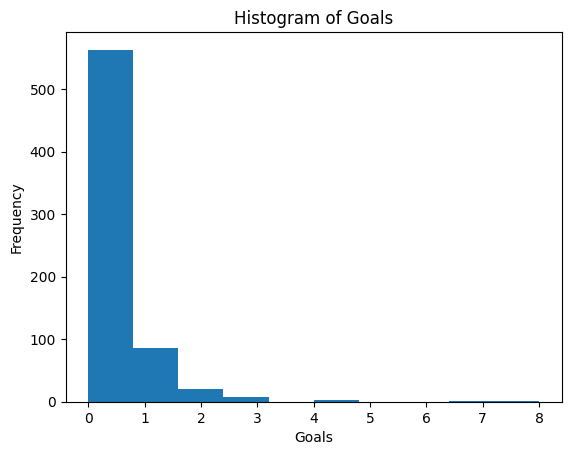

In [77]:
import matplotlib.pyplot as plt

plt.hist(df['goals'])
plt.title("Histogram of Goals")
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.show()

(c) Histogram of "Goals" and "Assists".

Since this histogram includes two categories of data, I added a legend and an overlap so the compairson is easily noticed. Using the "alpha" code creates the overlap between the two variables. I like the inclusion of the assists. It shows not only the actual scores, but also that many other players helped made that score possible. And as expected, it's still right skewed.

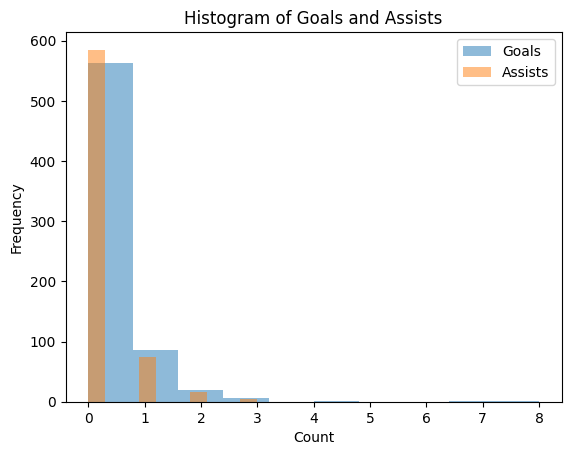

In [78]:
plt.hist(df['goals'], alpha=0.5, label='Goals')
plt.hist(df['assists'], alpha=0.5, label='Assists')

plt.title("Histogram of Goals and Assists")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

(d) Boxplot of "Yel" by nationality

This graph shows that most nationalities have a median of 0 yellow cards, which is quite impressive! Argentina has the most yellow cards at 3. Many nationalities have outliers, which are represented by the dots outside of the whiskers. Some nationalities also have a wider spread in the number of yellow cards received by the players which shows variability. When making this visualization, I rotated the x axis (rot=90) to make it easier to read.

<Figure size 2500x600 with 0 Axes>

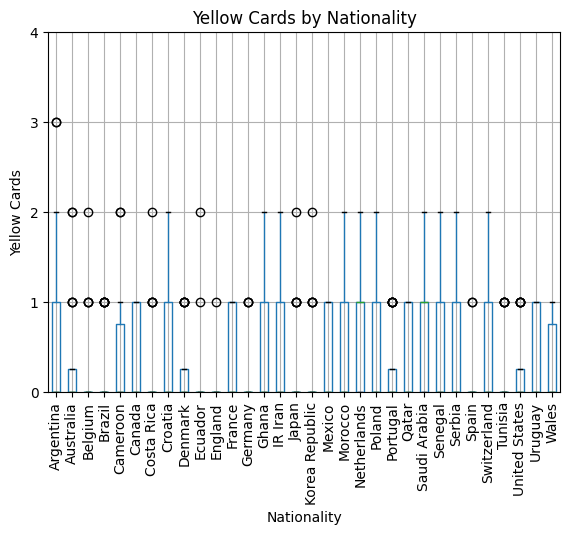

In [79]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(25,6))

df.boxplot(column='Yel', by='nationality', rot=90)

plt.title("Yellow Cards by Nationality")
plt.suptitle("")
plt.xlabel("Nationality")
plt.ylabel("Yellow Cards")

max_yel_cards = df['Yel'].max()
plt.ylim(0, max_yel_cards + 1)

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

(e) "Goals" and "Assists" Scatter including FC Barcelona

This graph shows the relationship between assists and goals again, but highlighting the club I selected, Barcelona. It mostly shows that players that score the most goals also have a higher number of assists. It's also evident that there were no outliers on the chart for Barcelona. I made the dots for the Barcelona club red, however I couldn't figure out how to improve this graph more.

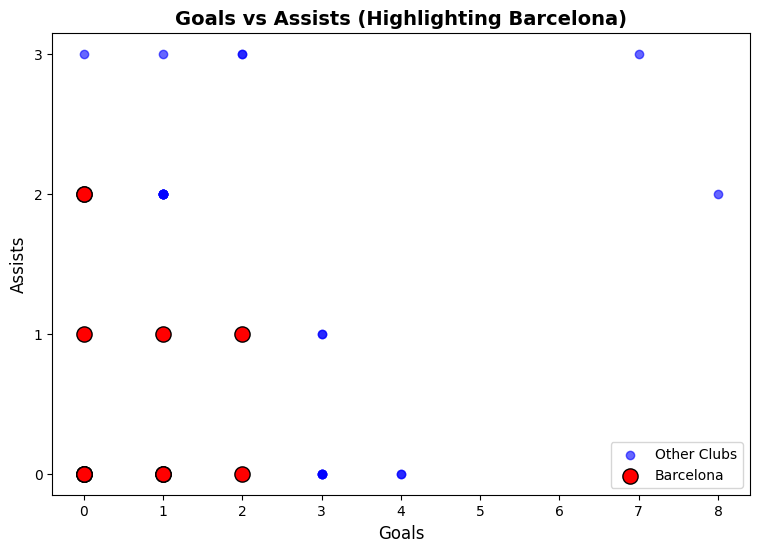

In [80]:
import matplotlib.pyplot as plt

favorite_club = "Barcelona"

others = df[df['club'] != favorite_club]
fav = df[df['club'] == favorite_club]

plt.figure(figsize=(9,6))

plt.scatter(others['goals'], others['assists'],
            color='blue', alpha=0.6, label='Other Clubs')

plt.scatter(fav['goals'], fav['assists'],
            color='red', s=120, edgecolor='black', label='Barcelona')

plt.title("Goals vs Assists (Highlighting Barcelona)", fontsize=14, weight='bold')
plt.xlabel("Goals", fontsize=12)
plt.ylabel("Assists", fontsize=12)

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.legend()

plt.show()

(f) A new visualization

For my visualization, I chose to show the top 10 clubs based on the number of goals. Since we were already talking about goals, I figured it would be interesting to see who was best at them. Immediately it's easy to see that Paris SG is way in the lead with 18 goals! While creating this visualization, I figured out that this line of code "plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))" is what made the axis change to integer tick labels instead of the auto ones from matplotlib that increased with values of 0.5. It's nice to see that my favorite club Barcelona is in second place. I think something that this may show about the data is that almost all of the clubs scored 8 or less goals, which makes Paris an outlier.

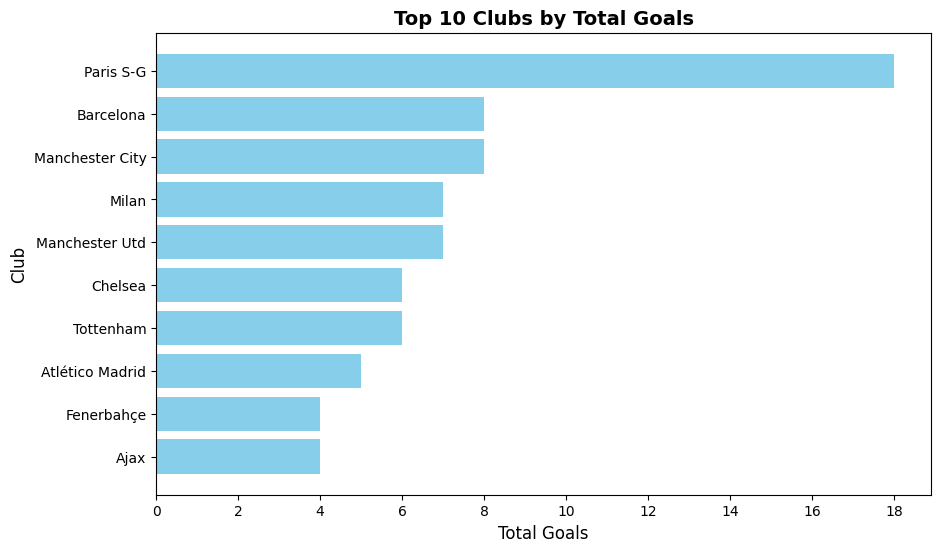

In [81]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

club_goals = df.groupby('club')['goals'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
bars = plt.barh(club_goals.index, club_goals, color='skyblue')
plt.gca().invert_yaxis()

plt.title("Top 10 Clubs by Total Goals", fontsize=14, weight='bold')
plt.xlabel("Total Goals", fontsize=12)
plt.ylabel("Club", fontsize=12)

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

(g) Confidence in getting an A

I'd say there is about an 78% chance that I get an A. I made a simple graph to showcase that, which probably proves why I think that.

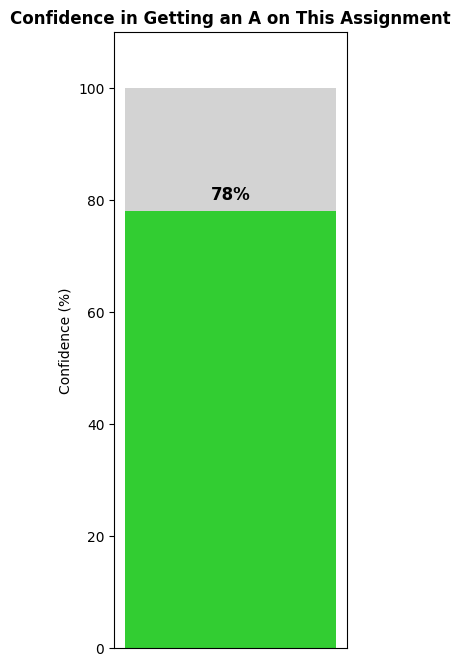

In [82]:
import matplotlib.pyplot as plt

confidence = 78

plt.figure(figsize=(3,8))

plt.bar(0, 100, color='lightgray', width=0.5)

plt.bar(0, confidence, color='limegreen', width=0.5)
plt.title("Confidence in Getting an A on This Assignment", fontsize=12, weight='bold')
plt.ylabel("Confidence (%)")
plt.xticks([])
plt.text(0, confidence + 2, f"{confidence}%", ha='center', fontsize=12, weight='bold')

plt.ylim(0, 110)
plt.show()

Reference: I attest that the resources above were the only ones utilized in completing the exam and the work included is my own and no one else from the course.